# Logistic Neurons

In [1]:
import numpy as np
from utils import make_classification, perceptron_decision_boundary, sigmoid
from sklearn.metrics import accuracy_score
from theano import tensor as T
from theano import function, shared
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('figure', figsize=(8, 6))
%matplotlib inline

## Activation of a logistic neuron:

## $$ z = \sum_{i \in L} x_{i}w_{i} + b$$ 

## Predicted output:

## $$ y = \frac{1}{1 + e^{-z}} $$

## Loss function: Mean Squared Error:
## $$ E = \frac{1}{2}\sum_{i \in T} (t^{i} - y^{i})^{2} $$
## Where $T$ is the set of training cases, and $t$ is the target value

# Logistic Neuron in NumPy:

## Step 1: Make dummy data

In [2]:
X, Y = make_classification()
W = np.random.rand(2, 1)
B = np.random.rand(1,)

/Users/jaidevd/src/ipec-fdp/utils.py:45: RuntimeWarning: covariance is not positive-semidefinite.
  xx = rng.multivariate_normal([0.5, 0.5], [[0, 0.05], [0.05, 0]], size=(100,))
/Users/jaidevd/src/ipec-fdp/utils.py:46: RuntimeWarning: covariance is not positive-semidefinite.
  yy = rng.multivariate_normal([-0.5, -0.5], [[0, 0.05], [0.05, 0]], size=(100,))


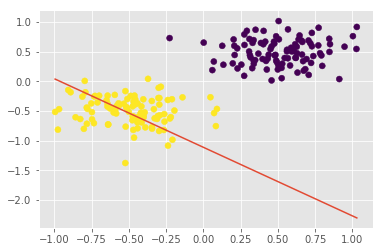

In [3]:
perceptron_decision_boundary(W.ravel().tolist() + [B[0]], X, Y)

## Step 2: Get activation and prediction

In [4]:
# activation
Z = np.dot(X, W) + B

# prediction
Y_pred = sigmoid(Z)

## Step 3: Derive gradient for loss function
## Gradient:  $\nabla{E} = \frac{\partial{E}}{\partial{w_{j}}}$

## Trick:
## $$
\begin{equation}
            \frac{\partial{\mathbf{E}}}{\partial{\mathbf{W}}} = \frac{\partial{\mathbf{y}}}{\partial{\mathbf{W}}}\frac{\partial{\mathbf{E}}}{\partial{\mathbf{y}}}
\end{equation}
$$

## Second term on RHS:
## $$\frac{\partial{\mathbf{E}}}{\partial{\mathbf{y}}} = -(\mathbf{t} - \mathbf{y})$$

## First term on RHS: (using same trick):
## $$\frac{\partial{\mathbf{y}}}{\partial{\mathbf{W}}} = \frac{\partial{\mathbf{y}}}{\partial{\mathbf{z}}}\frac{\partial{\mathbf{z}}}{\partial{\mathbf{W}}}$$

## From first exercise (Not available!), first term on RHS reduces to:
## $$\frac{\partial{\mathbf{y}}}{\partial{\mathbf{z}}} = \mathbf{y}(1 - \mathbf{y})$$

## From definition of logistic activation:
## $$\mathbf{z} = \mathbf{X}\mathbf{W} + \mathbf{b} $$

## Second term in RHS:
## $$\frac{\partial{\mathbf{z}}}{\partial{\mathbf{W}}} = \mathbf{X}$$

## Substituting:
## $$\frac{\partial{\mathbf{y}}}{\partial{\mathbf{W}}} = \mathbf{y}(1 - \mathbf{y})\mathbf{X}$$

## Substituting back in original equation
## $$\frac{\partial{\mathbf{E}}}{\partial{\mathbf{W}}} = -(\mathbf{t} - \mathbf{y})\mathbf{y}(1 - \mathbf{y})\mathbf{X}$$

# Using this gradient to train neuron with NumPy

In [5]:
def predict(X, weights, bias=None):
    if bias is not None:
        z = np.dot(X, weights) + bias
    else:
        z = np.dot(X, weights)
    return sigmoid(z)

def train(X, Y, weights, alpha=0.3):
    y_hat = predict(X, weights)
    _gw = -1 * (Y - y_hat) * y_hat * (1 - y_hat)
    _gw = np.repeat(_gw, X.shape[1], axis=1)
    weights -= (alpha * _gw * X).sum(0).reshape(-1, 1)
    return weights

def loss(y1, y2):
    return (0.5 * ((y1 - y2) ** 2)).sum()

In [6]:
for i in range(10000):
    y_hat = predict(X, W)
    W = train(X, Y, W)
    if i % 1000 == 0:
        print("Loss: ", loss(Y, y_hat))

Loss:  35.80080013599871
Loss:  0.01787693545379572
Loss:  0.009771470340672555
Loss:  0.006773080436553128
Loss:  0.0051962808330987134
Loss:  0.0042202662165375816
Loss:  0.003555416479285545
Loss:  0.0030728820890162617
Loss:  0.002706470751684973
Loss:  0.0024186373589378672


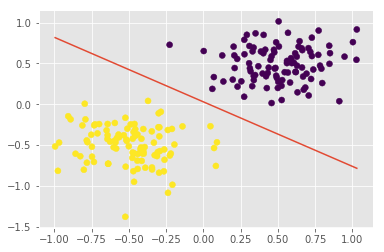

In [7]:
perceptron_decision_boundary(W.ravel().tolist() + [B[0]], X, Y)

# Exercise: Implement logistic neuron with Theano

In [ ]:
# enter code here